### Predicting the score of cricket matches by using LinearRegression and RandomForestRegressor models.

In [1]:
# Importing all the libraried to clean manipulate the data
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the Dataset
odi_predict = pd.read_csv('odicricket.csv')
odi_predict.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,13-06-2006,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,13-06-2006,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,13-06-2006,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,13-06-2006,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,13-06-2006,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


In [3]:
# Getting Info of the dataset
odi_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


In [4]:
# Checking that if is there any null value present in the dataset
odi_predict.apply(lambda x: sum(x.isnull()),axis=0)

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [5]:
# Replacing the string values with int values for applying the ML models
encode = {
            'bat_team': {'England':0,'Pakistan':1,'Sri Lanka':2,'Australia':3,'RSA':4,'New Zealand':5,'Bangladesh':6,'West Indies':7,'India':8,'Zimbabwe':9,'Ireland':10, 'Scotland':11,'Kenya':12,'Bermuda':13, 'Netherland':14, 'Canada':15, 'Practice team-I':16, 'Afghanistan':17, 'UAE':18, 'Hong Kong':19, 'Guinea':20},
            'bowl_team': {'England':0,'Pakistan':1,'Sri Lanka':2,'Australia':3,'RSA':4,'New Zealand':5,'Bangladesh':6,'West Indies':7,'India':8,'Zimbabwe':9,'Ireland':10, 'Scotland':11,'Kenya':12,'Bermuda':13, 'Netherland':14, 'Canada':15, 'Practice team-II':21, 'Afghanistan':17, 'UAE':18, 'Hong Kong':19, 'Guinea':20},
         }
odi_predict.replace(encode, inplace=True)
odi_predict.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,13-06-2006,"Civil Service Cricket Club, Stormont",0,10,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,13-06-2006,"Civil Service Cricket Club, Stormont",0,10,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,13-06-2006,"Civil Service Cricket Club, Stormont",0,10,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,13-06-2006,"Civil Service Cricket Club, Stormont",0,10,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,13-06-2006,"Civil Service Cricket Club, Stormont",0,10,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


In [6]:
dataset = odi_predict[['bat_team','bowl_team','runs','wickets','overs','striker','non-striker']]
dataset.head(2)

,bat_team,bowl_team,runs,wickets,overs,striker,non-striker
0,0,10,0,0,0.1,0,0
1,0,10,0,0,0.2,0,0


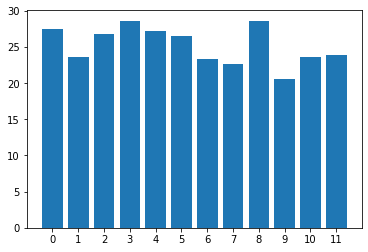

In [7]:
# Using Seaborn to visualize the average run scored by the teams at over 5.6
import seaborn as sns
yLabel=[]
for i in range(0,12):
    runs = odi_predict.loc[(odi_predict['bat_team'] == i) & (odi_predict['overs'] == 5.6)]['runs']
    avg = sum(runs)/len(runs)
    yLabel.append(avg)
    
xLabel = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
plt.bar(xLabel, yLabel)

plt.show()

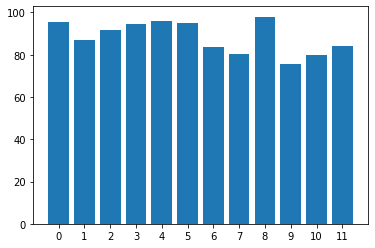

In [8]:
# Using Seaborn to visualize the average run scored by the teams at over 19.6
import seaborn as sns
yLabel=[]
for i in range(0,12):
    runs = odi_predict.loc[(odi_predict['bat_team'] == i) & (odi_predict['overs'] == 19.6)]['runs']
    avg = sum(runs)/len(runs)
    yLabel.append(avg)
    
xLabel = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
plt.bar(xLabel, yLabel)

plt.show()

In [9]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0

    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [10]:
# Splitting the dataset into X and y for making predictions
X = odi_predict.iloc[:,[3,4,7,8,9,12,13]].values
y = odi_predict.iloc[:, 14].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Importing the LinearRegression model and fitting it for making prediction on given dataset
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R square value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R square value: 53.922634883145825
Custom accuracy: 43.798233114847534


In [13]:
# Importing the numpy and predicting the run by giving partical information 
import numpy as np
batTeam = 2
ballTeam = 1
currentRuns = 58
curentWicketsDown = 3
currentOver = 7
strikeRun = 7
nonStrikerRun = 2
new_prediction = lin.predict(sc.transform(np.array([[batTeam,ballTeam,currentRuns,curentWicketsDown,currentOver,strikeRun,nonStrikerRun]])))
print("Prediction score:" , new_prediction)

Prediction score: [252.23863379]


In [14]:
# importing RandomForestRegressor model and fitting it on the dataset to make prediction
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,max_features=None)
reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
y_pred = reg.predict(X_test)
score = reg.score(X_test,y_test)*100
print("R square value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,20))

R square value: 94.6900367579275
Custom accuracy: 93.21972071815333


In [16]:
# Predicting the run by giving partical information 
batTeam = 0
ballTeam = 10
currentRuns = 123
curentWicketsDown = 4
currentOver = 28
strikeRun = 7
nonStrikerRun = 2
new_prediction = reg.predict(sc.transform(np.array([[batTeam,ballTeam,currentRuns,curentWicketsDown,currentOver,strikeRun,nonStrikerRun]])))
print("Prediction score:" , new_prediction)

Prediction score: [244.83]
